11490434/11490434 [==============================] - 0s 0us/step
Sigmoid - Neurons: 16, Layers: 1
Test Loss: 0.3541, Test Accuracy: 0.9066


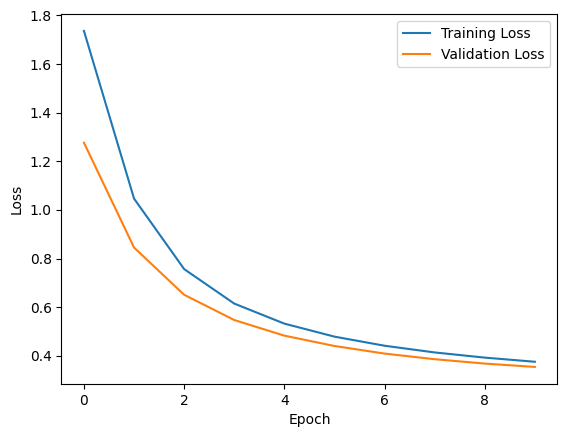

Sigmoid - Neurons: 16, Layers: 2
Test Loss: 0.5693, Test Accuracy: 0.8561


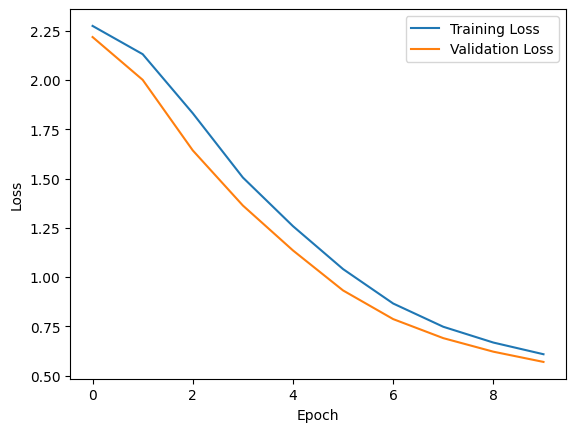

Sigmoid - Neurons: 16, Layers: 3
Test Loss: 1.4118, Test Accuracy: 0.4551


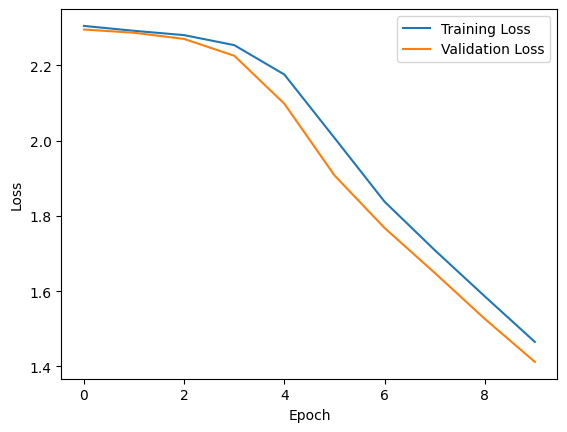

Sigmoid - Neurons: 32, Layers: 1
Test Loss: 0.3167, Test Accuracy: 0.9142


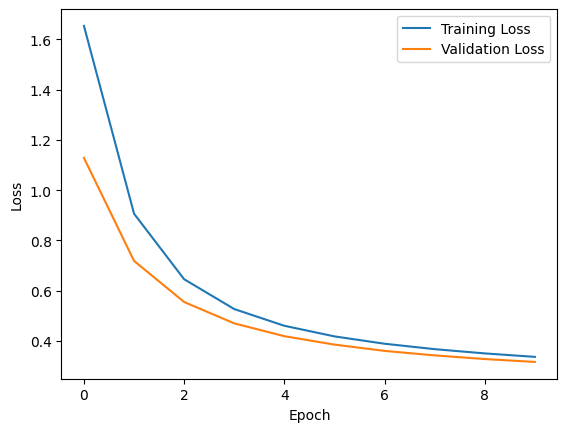

Sigmoid - Neurons: 32, Layers: 2
Test Loss: 0.4579, Test Accuracy: 0.8783


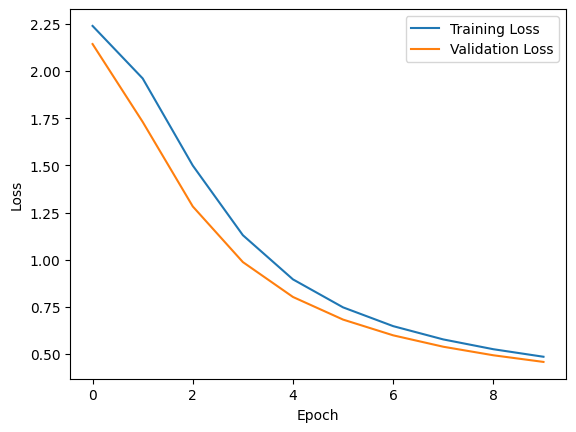

Sigmoid - Neurons: 32, Layers: 3
Test Loss: 0.9009, Test Accuracy: 0.7453


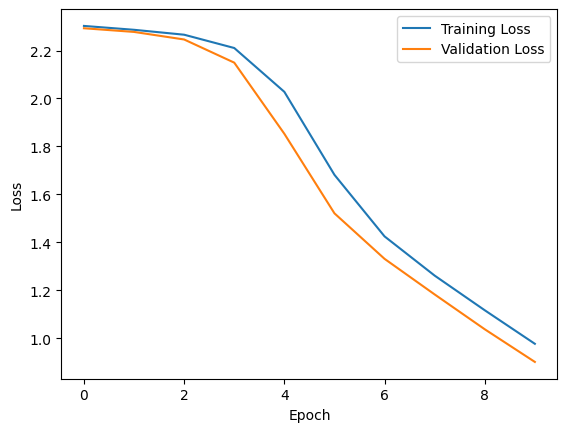

Sigmoid - Neurons: 64, Layers: 1
Test Loss: 0.3100, Test Accuracy: 0.9143


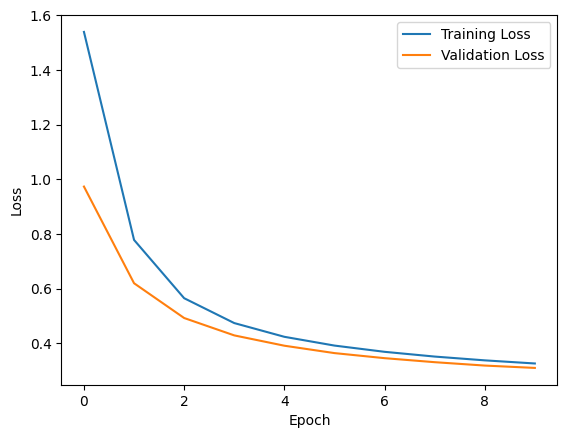

Sigmoid - Neurons: 64, Layers: 2
Test Loss: 0.3785, Test Accuracy: 0.8949


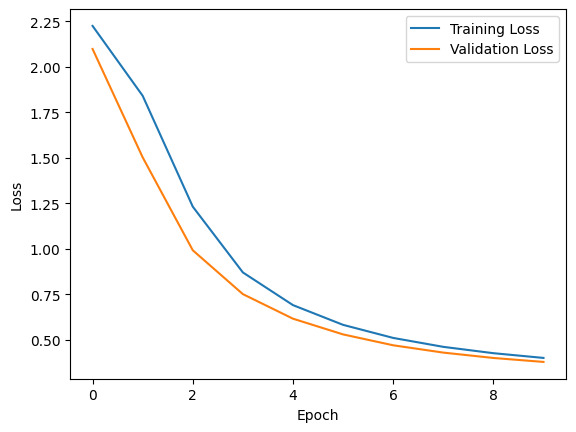

Sigmoid - Neurons: 64, Layers: 3
Test Loss: 0.7323, Test Accuracy: 0.7941


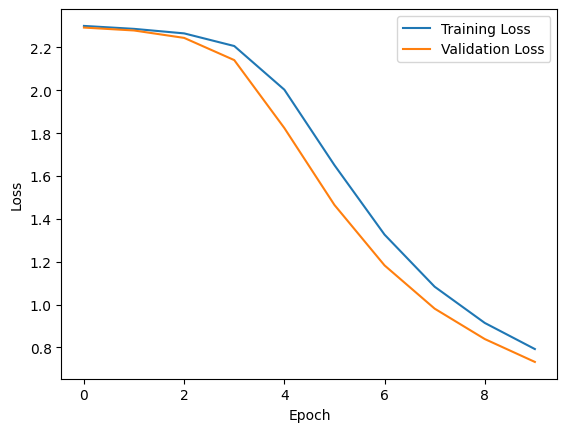

ReLU - Neurons: 16, Layers: 1
Test Loss: 0.2364, Test Accuracy: 0.9328


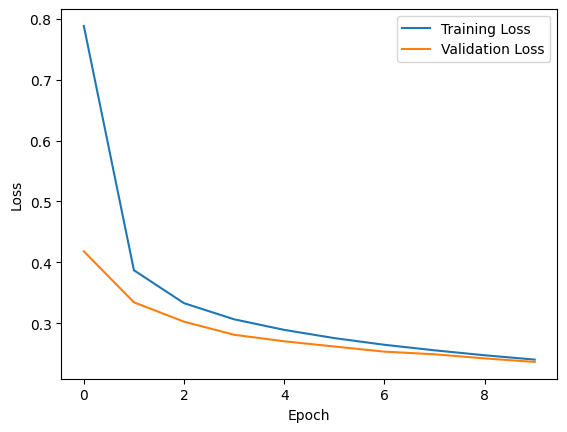

ReLU - Neurons: 16, Layers: 2
Test Loss: 0.1919, Test Accuracy: 0.9434


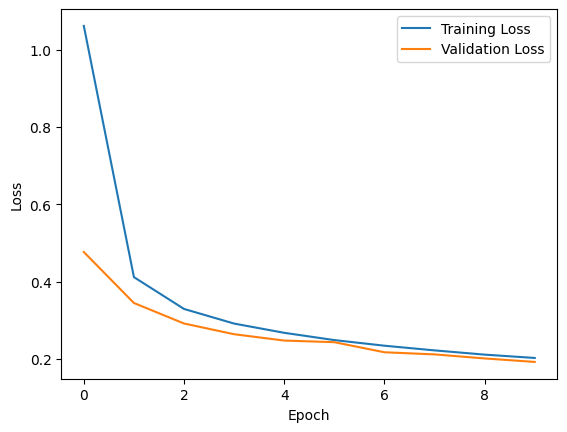

ReLU - Neurons: 16, Layers: 3
Test Loss: 0.1968, Test Accuracy: 0.9435


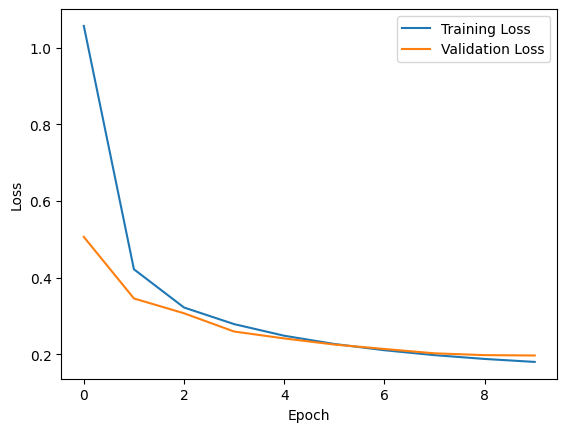

ReLU - Neurons: 32, Layers: 1
Test Loss: 0.1986, Test Accuracy: 0.9412


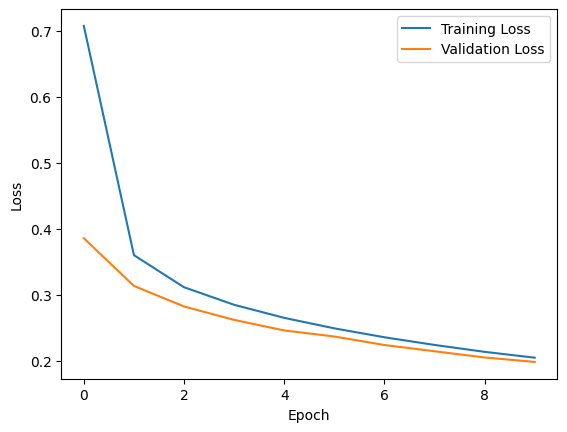

ReLU - Neurons: 32, Layers: 2
Test Loss: 0.1550, Test Accuracy: 0.9550


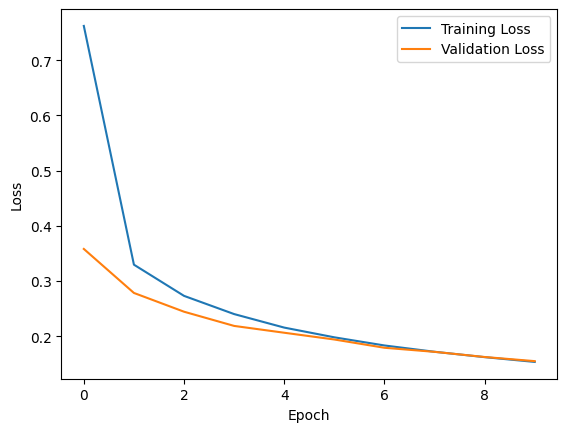

ReLU - Neurons: 32, Layers: 3
Test Loss: 0.1305, Test Accuracy: 0.9596


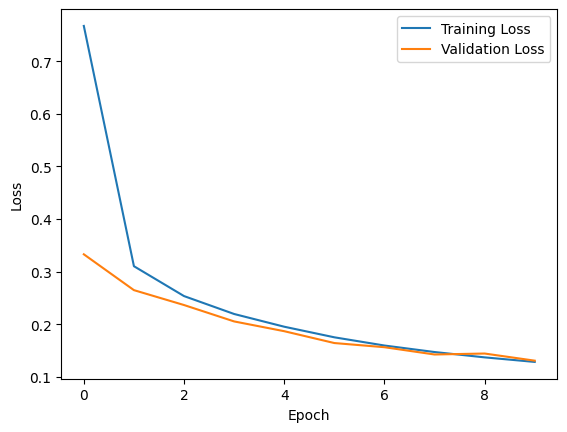

ReLU - Neurons: 64, Layers: 1
Test Loss: 0.1704, Test Accuracy: 0.9517


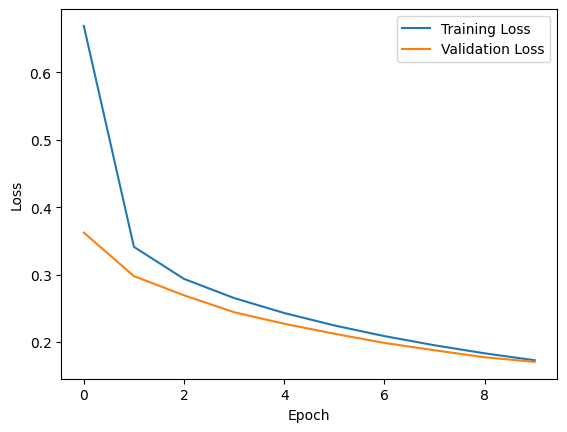

ReLU - Neurons: 64, Layers: 2
Test Loss: 0.1347, Test Accuracy: 0.9593


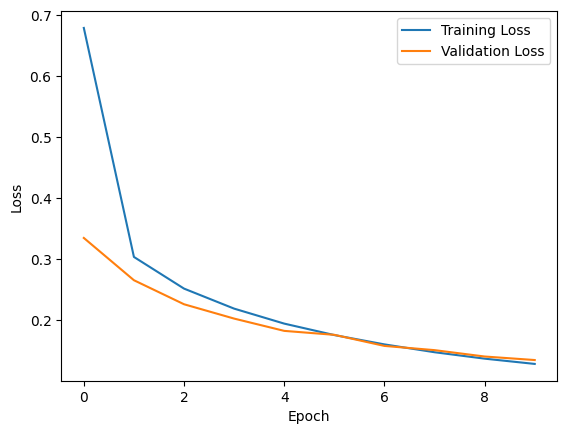

ReLU - Neurons: 64, Layers: 3
Test Loss: 0.1177, Test Accuracy: 0.9640


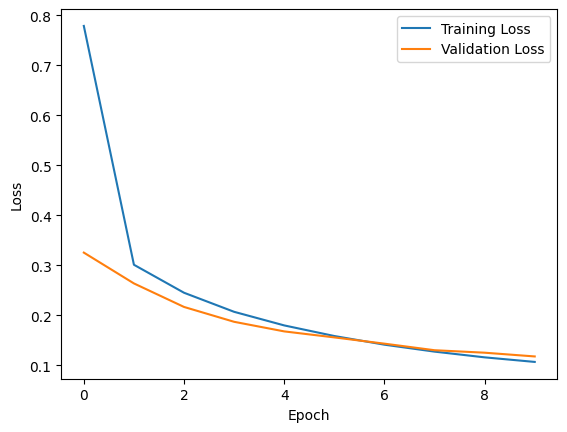

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten images for the neural network
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Function to create and train the model
def create_and_train_model(neurons_per_layer, num_layers, activation_function):
    model = Sequential()

    # Input layer
    model.add(Dense(neurons_per_layer, activation=activation_function, input_shape=(784,)))

    # Hidden layers
    for _ in range(num_layers - 1):
        model.add(Dense(neurons_per_layer, activation=activation_function))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=SGD(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

    history = model.fit(train_images_flat, train_labels, epochs=10, validation_data=(test_images_flat, test_labels), verbose=0)

    return model, history

# Test different structures with Sigmoid activation
neurons_list = [16, 32, 64]
layers_list = [1, 2, 3]

for neurons in neurons_list:
    for layers in layers_list:
        model, history = create_and_train_model(neurons, layers, 'sigmoid')

        # Evaluate model on test data
        test_loss, test_accuracy = model.evaluate(test_images_flat, test_labels, verbose=0)

        # Display results
        print(f"Sigmoid - Neurons: {neurons}, Layers: {layers}")
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

        # Plot learning curve
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

# Test different structures with ReLU activation
for neurons in neurons_list:
    for layers in layers_list:
        model, history = create_and_train_model(neurons, layers, 'relu')

        # Evaluate model on test data
        test_loss, test_accuracy = model.evaluate(test_images_flat, test_labels, verbose=0)

        # Display results
        print(f"ReLU - Neurons: {neurons}, Layers: {layers}")
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

        # Plot learning curve
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()


Neurons: 16, Layers: 1
Test Classification Error: 0.0952


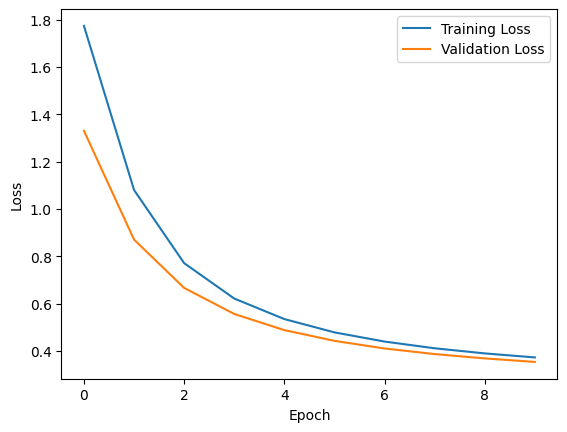

Neurons: 16, Layers: 2
Test Classification Error: 0.1518


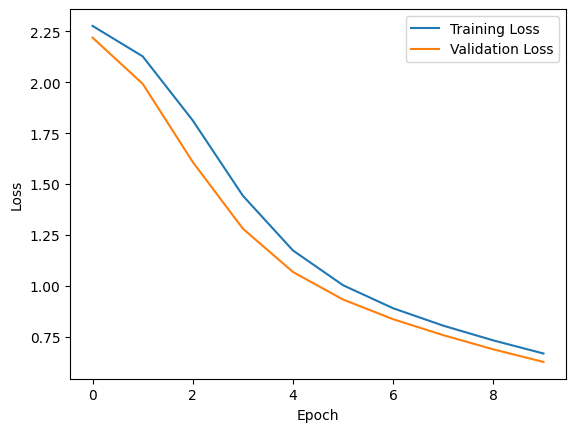

Neurons: 16, Layers: 3
Test Classification Error: 0.4207


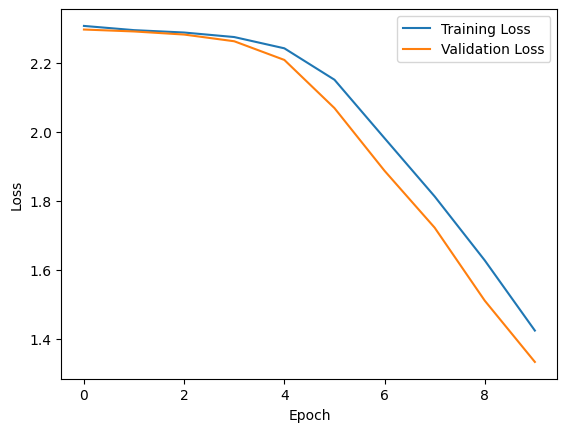

Neurons: 32, Layers: 1
Test Classification Error: 0.0891


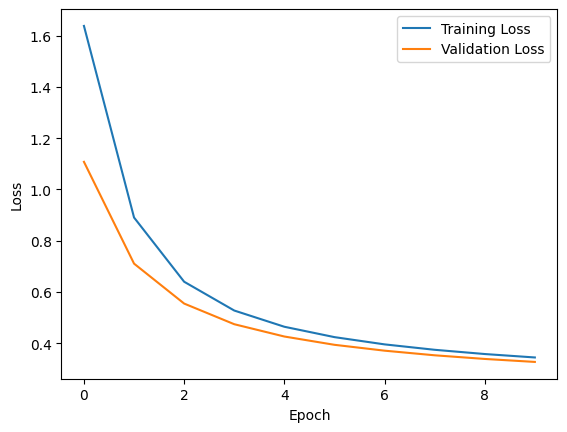

Neurons: 32, Layers: 2
Test Classification Error: 0.1190


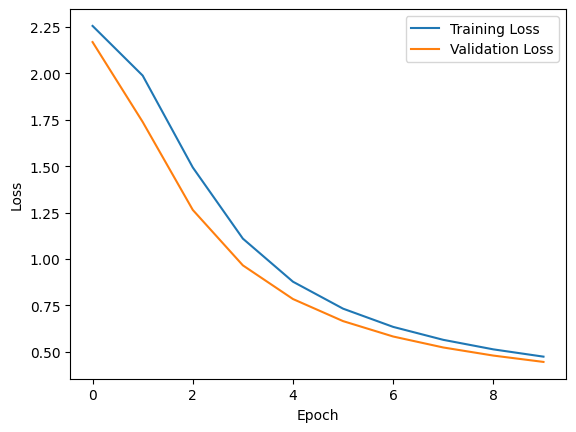

Neurons: 32, Layers: 3
Test Classification Error: 0.2759


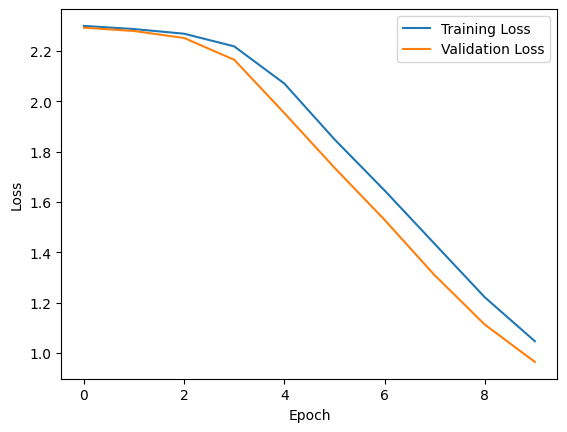

Neurons: 64, Layers: 1
Test Classification Error: 0.0858


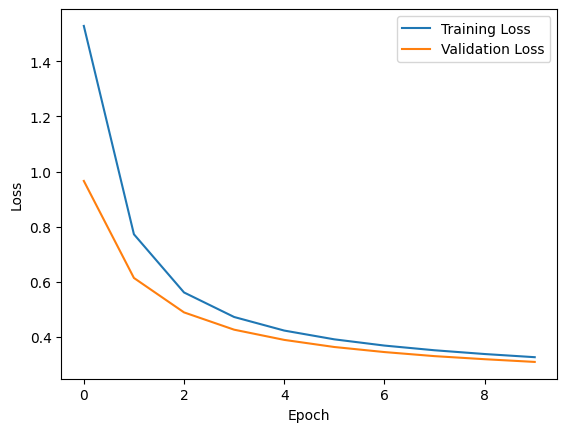

Neurons: 64, Layers: 2
Test Classification Error: 0.1060


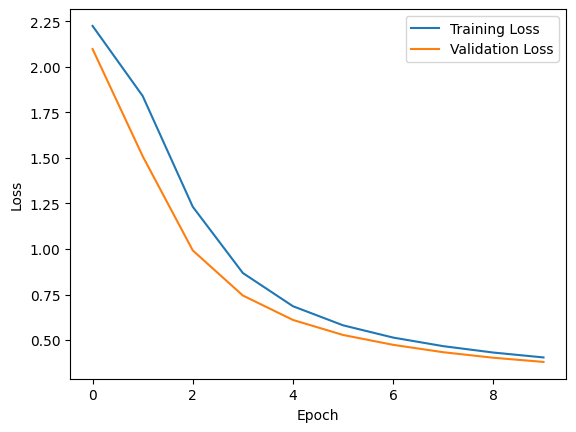

Neurons: 64, Layers: 3
Test Classification Error: 0.2197


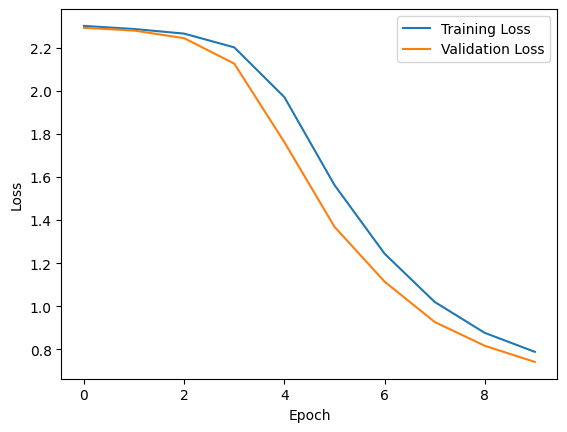

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 64)                50240     
                                                                 
 dense_73 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten images for the neural network
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Function to create and train the model
def create_and_train_model(neurons_per_layer, num_layers):
    model = Sequential()

    # Input layer
    model.add(Dense(neurons_per_layer, activation='sigmoid', input_shape=(784,)))

    # Hidden layers
    for _ in range(num_layers - 1):
        model.add(Dense(neurons_per_layer, activation='sigmoid'))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=SGD(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

    history = model.fit(train_images_flat, train_labels, epochs=10, validation_data=(test_images_flat, test_labels), verbose=0)

    return model, history

# Test different structures
neurons_list = [16, 32, 64]
layers_list = [1, 2, 3]

best_model = None
best_classification_error = float('inf')

for neurons in neurons_list:
    for layers in layers_list:
        model, history = create_and_train_model(neurons, layers)

        # Evaluate model on test data
        test_loss, test_accuracy = model.evaluate(test_images_flat, test_labels, verbose=0)

        # Calculate classification error
        test_classification_error = 1 - test_accuracy

        # Display results
        print(f"Neurons: {neurons}, Layers: {layers}")
        print(f"Test Classification Error: {test_classification_error:.4f}")

        # Update the best model if the current model performs better
        if test_classification_error < best_classification_error:
            best_classification_error = test_classification_error
            best_model = model

        # Plot learning curve
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

# Display the best model summary
best_model.summary()


Neurons: 16, Layers: 1
Test Classification Error: 0.0907


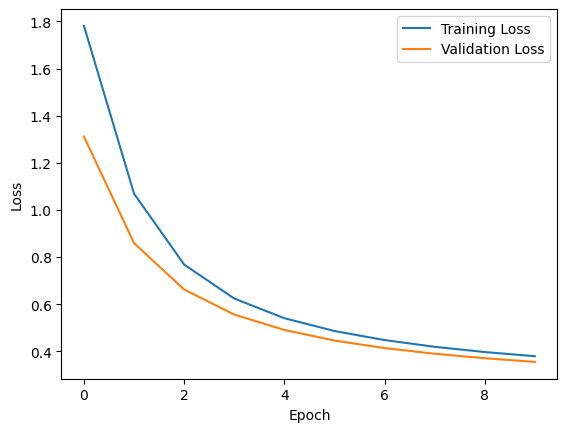

Neurons: 16, Layers: 2
Test Classification Error: 0.1566


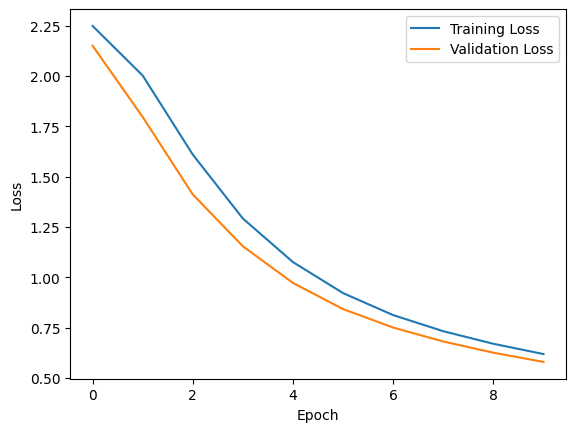

Neurons: 16, Layers: 3
Test Classification Error: 0.3218


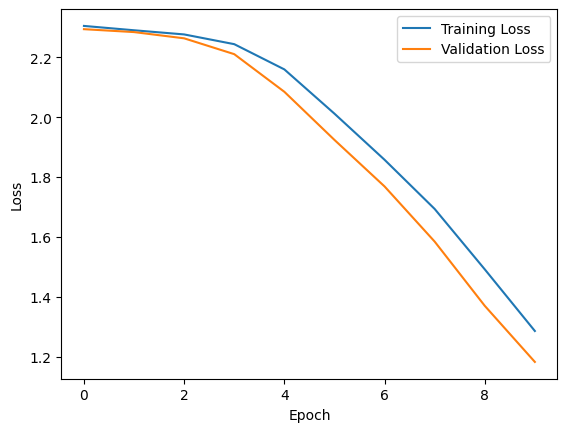

Neurons: 32, Layers: 1
Test Classification Error: 0.0873


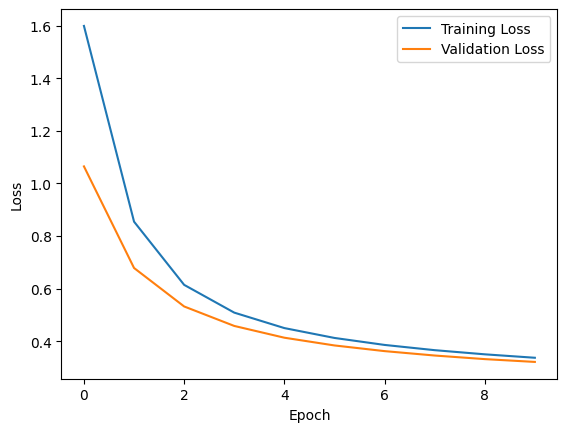

Neurons: 32, Layers: 2
Test Classification Error: 0.1194


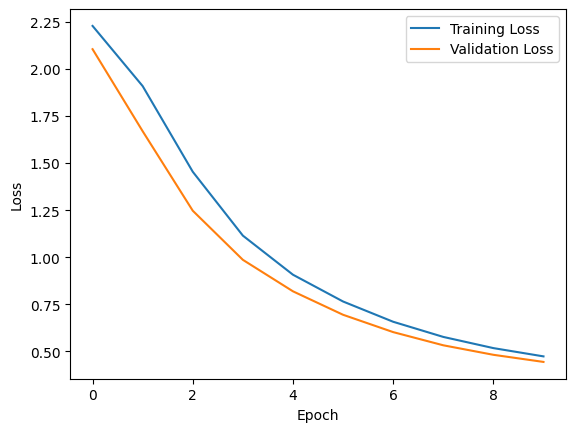

Neurons: 32, Layers: 3
Test Classification Error: 0.3756


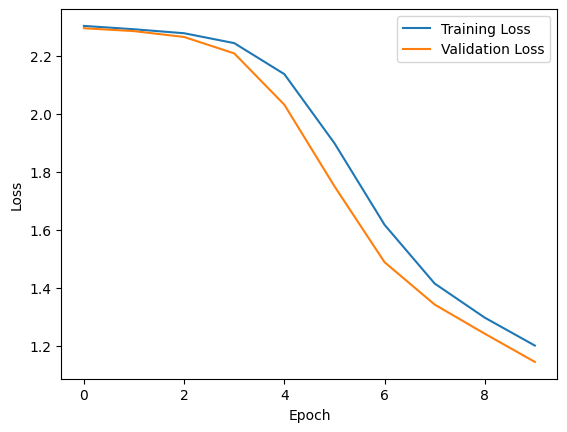

Neurons: 64, Layers: 1
Test Classification Error: 0.0869


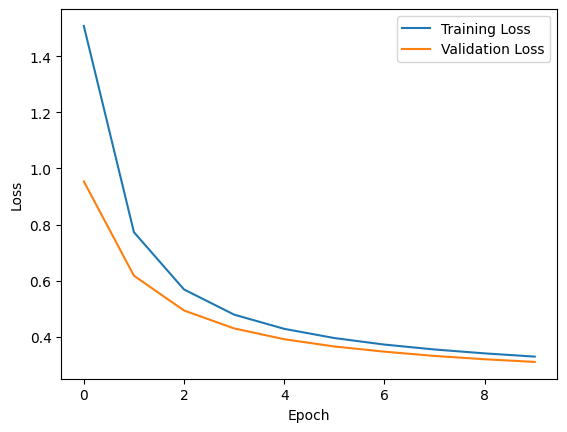

Neurons: 64, Layers: 2
Test Classification Error: 0.1047


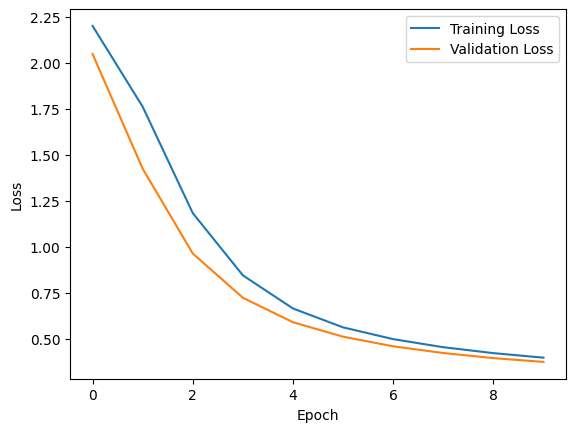

Neurons: 64, Layers: 3
Test Classification Error: 0.2167


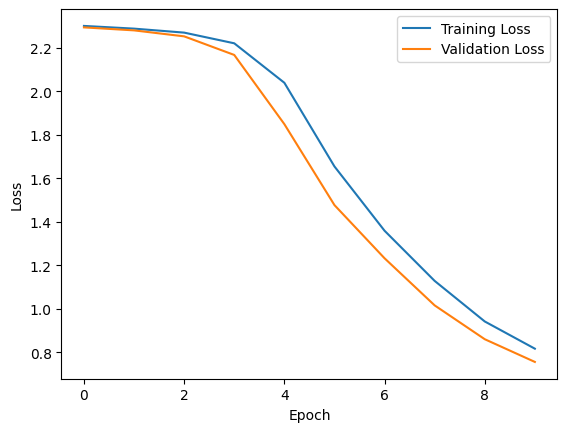

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 64)                50240     
                                                                 
 dense_100 (Dense)           (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten images for the neural network
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Function to create and train the model
def create_and_train_model(neurons_per_layer, num_layers):
    model = Sequential()

    # Input layer
    model.add(Dense(neurons_per_layer, activation='sigmoid', input_shape=(784,)))

    # Hidden layers
    for _ in range(num_layers - 1):
        model.add(Dense(neurons_per_layer, activation='sigmoid'))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=SGD(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

    history = model.fit(train_images_flat, train_labels, epochs=10, validation_data=(test_images_flat, test_labels), verbose=0)

    return model, history

# Test different structures
neurons_list = [16, 32, 64]
layers_list = [1, 2, 3]

best_model = None
best_classification_error = float('inf')

for neurons in neurons_list:
    for layers in layers_list:
        model, history = create_and_train_model(neurons, layers)

        # Evaluate model on test data
        test_loss, test_accuracy = model.evaluate(test_images_flat, test_labels, verbose=0)

        # Calculate classification error
        test_classification_error = 1 - test_accuracy

        # Display results
        print(f"Neurons: {neurons}, Layers: {layers}")
        print(f"Test Classification Error: {test_classification_error:.4f}")

        # Update the best model if the current model performs better
        if test_classification_error < best_classification_error:
            best_classification_error = test_classification_error
            best_model = model

        # Plot learning curve
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

# Display the best model summary
best_model.summary()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten images for the neural network
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Function to create and train the model
def create_and_train_model(neurons_per_layer, num_layers):
    model = Sequential()

    # Input layer
    model.add(Dense(neurons_per_layer, activation='sigmoid', input_shape=(784,)))

    # Hidden layers
    for _ in range(num_layers - 1):
        model.add(Dense(neurons_per_layer, activation='sigmoid'))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=SGD(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

    history = model.fit(train_images_flat, train_labels, epochs=10, validation_data=(test_images_flat, test_labels), verbose=0)

    return model, history

# Test different structures
neurons_list = [16, 32, 64]
layers_list = [1, 2, 3]

best_model = None
best_classification_error = float('inf')

for neurons in neurons_list:
    for layers in layers_list:
        model, history = create_and_train_model(neurons, layers)

        # Evaluate model on test data
        test_loss, test_accuracy = model.evaluate(test_images_flat, test_labels, verbose=0)

        # Calculate classification error
        test_classification_error = 1 - test_accuracy

        # Display results
        print(f"Neurons: {neurons}, Layers: {layers}")
        print(f"Test Classification Error: {test_classification_error:.4f}")

        # Update the best model if the current model performs better
        if test_classification_error < best_classification_error:
            best_classification_error = test_classification_error
            best_model = model

        # Plot learning curve
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

# Display the best model summary
best_model.summary()


Neurons: 16, Layers: 1
Test Classification Error: 0.0958


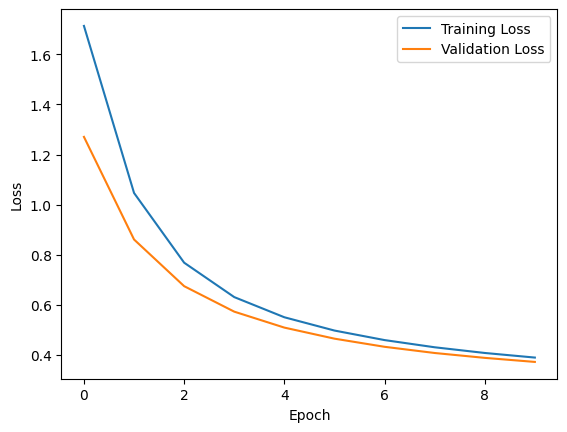

Neurons: 16, Layers: 2
Test Classification Error: 0.1504


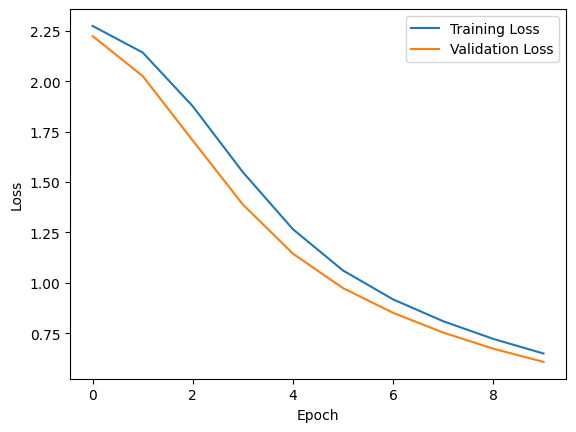

Neurons: 16, Layers: 3
Test Classification Error: 0.4020


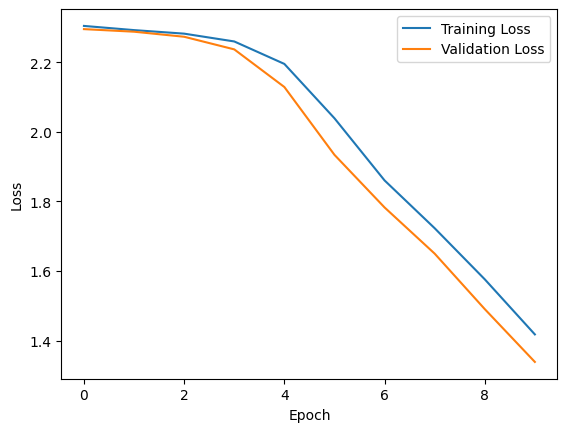

Neurons: 32, Layers: 1
Test Classification Error: 0.0860


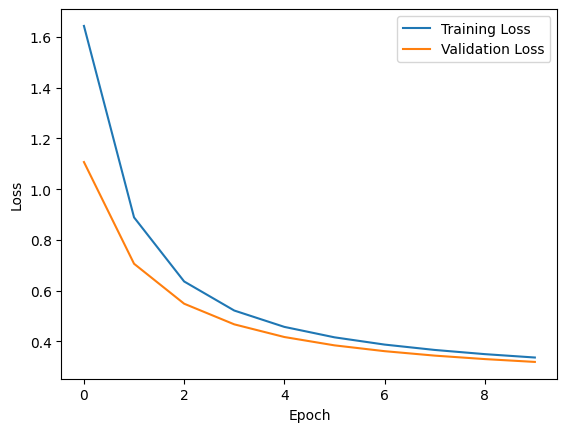

Neurons: 32, Layers: 2
Test Classification Error: 0.1115


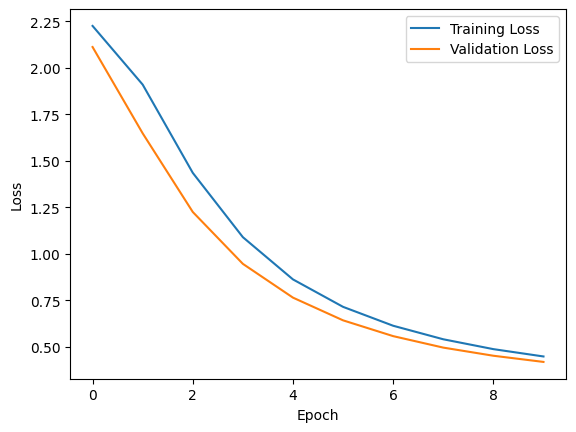

Neurons: 32, Layers: 3
Test Classification Error: 0.3742


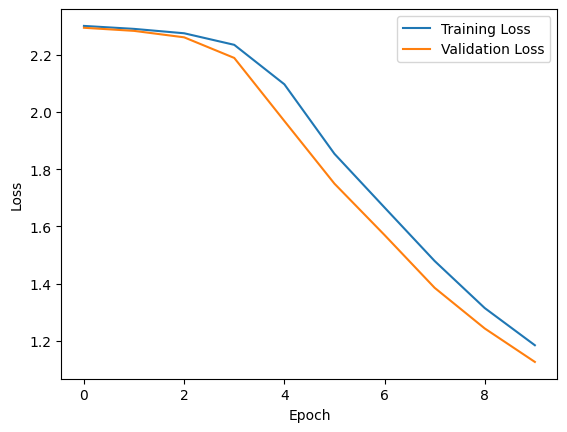

Neurons: 64, Layers: 1
Test Classification Error: 0.0872


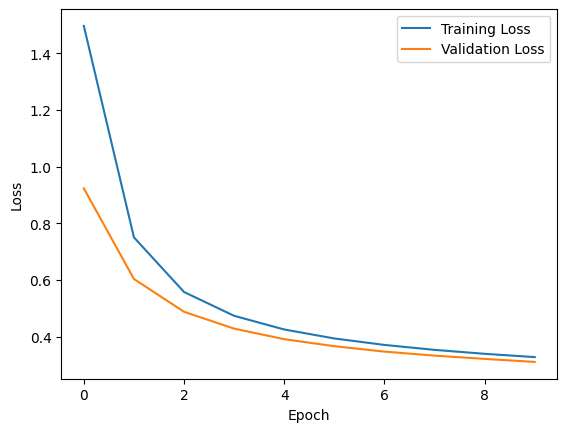

Neurons: 64, Layers: 2
Test Classification Error: 0.1048


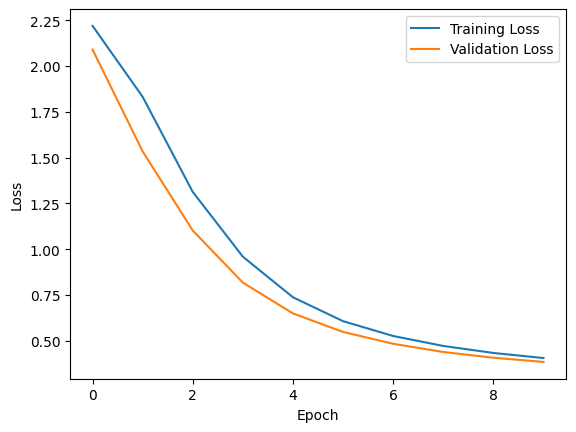

Neurons: 64, Layers: 3
Test Classification Error: 0.1612


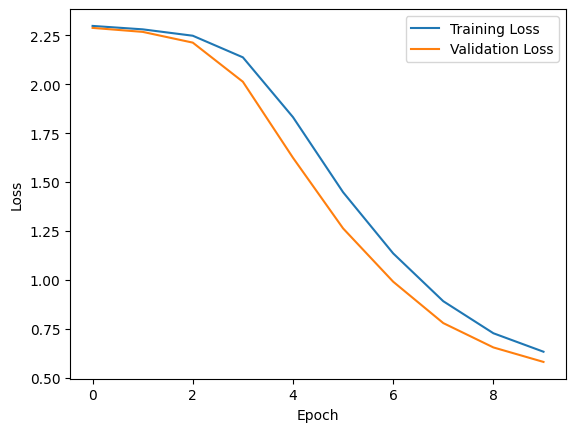

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 32)                25120     
                                                                 
 dense_118 (Dense)           (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten images for the neural network
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Function to create and train the model
def create_and_train_model(neurons_per_layer, num_layers):
    model = Sequential()

    # Input layer
    model.add(Dense(neurons_per_layer, activation='sigmoid', input_shape=(784,)))

    # Hidden layers
    for _ in range(num_layers - 1):
        model.add(Dense(neurons_per_layer, activation='sigmoid'))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=SGD(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

    history = model.fit(train_images_flat, train_labels, epochs=10, validation_data=(test_images_flat, test_labels), verbose=0)

    return model, history

# Test different structures
neurons_list = [16, 32, 64]
layers_list = [1, 2, 3]

best_model = None
best_classification_error = float('inf')

for neurons in neurons_list:
    for layers in layers_list:
        model, history = create_and_train_model(neurons, layers)

        # Evaluate model on test data
        test_loss, test_accuracy = model.evaluate(test_images_flat, test_labels, verbose=0)

        # Calculate classification error
        test_classification_error = 1 - test_accuracy

        # Display results
        print(f"Neurons: {neurons}, Layers: {layers}")
        print(f"Test Classification Error: {test_classification_error:.4f}")

        # Update the best model if the current model performs better
        if test_classification_error < best_classification_error:
            best_classification_error = test_classification_error
            best_model = model

        # Plot learning curve
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

# Display the best model summary
best_model.summary()
